## Integração do Pandas com outros formatos


O pandas tem um conjunto bem extenso de funções de leitura. Cada uma delas pode ser extremamente customizada (principalmente no caso de formatos provindos de arquivos de texto.

Abaixo temos uma lista de todas as funções de leitura que são expostas pelo módulo do pandas.


In [7]:
import pandas as pd
import inspect 

_ = [print(name) 
     for name, _ in inspect.getmembers(pd, predicate=inspect.isfunction) 
     if name.startswith('read') or name.startswith('from')]

read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_parquet
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table


E aqui temos todos os construtores diferentes do pandas. (Aqui construtores é um termo de OOP, que tem a ver com diferentes formas de se construir um `pandas.DataFrame`)

In [12]:
_ = [print(name) 
     for name, _ in inspect.getmembers(pd.DataFrame, predicate=inspect.ismethod) 
     if name.startswith('read') or name.startswith('from')]

from_csv
from_dict
from_items
from_records


## Nova fonte de dados

Agora vamos brincar com uma fonte de dados que junta dados do ranking de músicas mais "quentes" da Billboard com informações e features de músicas que o Spotify gera que são usados por seus algorítmos de recomendação.

Vc pode saber mais sobre a fonte de dados do Spotify nesse link [aqui](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

Mas, reproduzo abaixo uma descrição dessas variáveis.

|Feature|Description|
|----|-----|
|acousticness|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|danceability|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|energy|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|instrumentalness|Predicts whether a track contains no vocals. "oh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|loudness|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|tempo|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|valence|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|

------
Rode no seu terminal o seguinte comando para obter o banco de dados em `sqlite3`:

```bash
$ python -m zipfile -e billboard-200.db.zip .
```

Ele irá extrair os dados do arquivo `.zip` e irá colocá-los no mesmo diretório. Dentro desse arquivo zipado existe o banco `billboard-200.db`.
Dentro dele temos 3 tabelas:

- **album_infos**: informações pertinentes aos albuns
- **song_features**: informações e fetures de músicas individuais
- **billboard_ranking**: ranking semanal de albuns no billboard. Cada album aparece uma semana em possui uma posição.

Todas elas se juntam via `album_id`.

## Pandas e SQL

O pandas possuí três funções para lidar com sql:

- read_sql
- read_sql_query
- read_sql_table

Elas esperam um objeto de conexão para realizar que se conecta com a fonte de dados. No caso do `sqlite3` ele se conecta com o banco através do `sqlite3.connect`. No caso do Postgres, isso se dá através do driver `psycopg2`.
Cada banco ou tecnologia expõe algo parecido com isso, ou um extrator para objetos em tipos de dados do python (daí vem a importância de construtores alternativos)



In [11]:
import pandas as pd
import sqlite3

con = sqlite3.connect('billboard-200.db')

query = 'select * from song_features limit 100'


df = pd.read_sql(query, con)

df.head()


,song_id,song_name,album_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,MODE,speechiness,tempo,time_signature,valence
0,0Veyvc3n9AcLSoK3r1dA12,Voices In My Head,3r5hf3Cj3EMh1C2saQ8jyt,0.0555,0.754,142301.0,0.663,0.000000,6,0.101,-6.311,0,0.427,90.195,4,0.207
1,77JzXZonNumWsuXKy9vr3U,Beasty,3r5hf3Cj3EMh1C2saQ8jyt,0.2920,0.860,152829.0,0.418,0.000000,7,0.106,-9.061,0,0.158,126.023,4,0.374
2,18yllZD0TdF7ykcREib8Z1,I Did It,3r5hf3Cj3EMh1C2saQ8jyt,0.1530,0.718,215305.0,0.454,0.000046,8,0.116,-9.012,1,0.127,89.483,4,0.196
3,1wJRveJZLSb1rjhnUHQiv6,Swervin (feat. 6ix9ine),3r5hf3Cj3EMh1C2saQ8jyt,0.0153,0.581,189487.0,0.662,0.000000,9,0.111,-5.239,1,0.303,93.023,4,0.434
4,0jAfdqv18goRTUxm3ilRjb,Startender (feat. Offset and Tyga),3r5hf3Cj3EMh1C2saQ8jyt,0.0235,0.736,192779.0,0.622,0.000000,6,0.151,-4.653,0,0.133,191.971,4,0.506


O que, na minha opinião é bem mais útil que lidar com listas de tuplas de dados!

## Perguntas interessantes!

Aqui o meu foco é, junto com vcs pensar e responder algumas perguntas!

### 1. Como se diferencia, ao longo das décadas a distribuição de *acousticness*?

In [18]:
query = """
SELECT release_date,
       (strftime('%Y', release_date) / 10)*10 AS decade,
       acousticness
FROM song_features LEFT
NATURAL JOIN album_infos
where (strftime('%Y', release_date) / 10)*10 > 0
"""

def get_data(query):
    with sqlite3.connect('billboard-200.db') as db:
        df = pd.read_sql(query, db)
    return df


df = get_data(query)

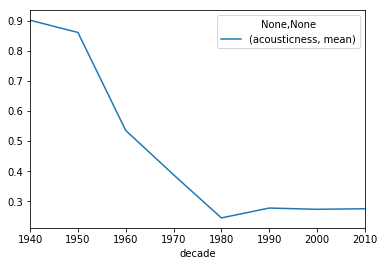

In [64]:
%matplotlib inline

df.groupby('decade').agg({'acousticness': ['mean']}).plot()

Mas quão realista é essa tendência que observamos acima?

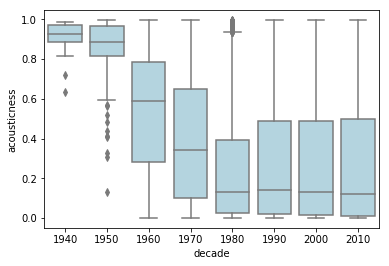

In [48]:
import seaborn as sns 

p = sns.boxplot(x='decade', y='acousticness', data=df, color='lightblue')

### O que devo fazer no pandas e o que devo fazer no BD?

Essa pergunta é bem válida. O que deve se considerar:

- conhecimento de ferramentas (se eu não conheço como vou pensar na solução)
- funções e bibliotecas de utilidades que existem em cada plataforma
- granularidade da análise
- Grau de EDA (quanto mais EDA for o foco do projeto mais o pandas deve ser útil)

### 2. Qual é a relação entre *danceability* e *instrumentalness* dos artistas que mais populares nos anos 2000 ou depois?

In [75]:
query = """
SELECT album_infos.artist,
       song_features.*
FROM song_features
LEFT JOIN album_infos ON album_infos.album_id = song_features.album_id
WHERE album_infos.artist IN
    ( SELECT artist
     FROM billboard_ranking 
     LEFT NATURAL JOIN album_infos
     where album_infos.release_date >= '2000-01-01'
     GROUP BY 1
     ORDER BY avg(rank)
     LIMIT 20)
"""

df = get_data(query)
df

,artist,song_id,song_name,album_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,MODE,speechiness,tempo,time_signature,valence
0,Post Malone,3fpVWegR6YOS1Yk5HSMYIq,Paranoid,6trNtQUgC8cgbWcqoMYkOR,0.037900,0.610,221787.0,0.554,0.000038,0,0.1660,-5.501,1,0.1370,159.850,4,0.2440
1,Post Malone,5VuxWXbt7XENQCtE9TzpTv,Spoil My Night (feat. Swae Lee),6trNtQUgC8cgbWcqoMYkOR,0.337000,0.669,194560.0,0.675,0.000015,1,0.1090,-2.869,1,0.0337,160.911,4,0.2620
2,Post Malone,2VdT56BGpdqNHUgOe1j5vc,Rich & Sad,6trNtQUgC8cgbWcqoMYkOR,0.186000,0.601,206453.0,0.590,0.000000,2,0.0942,-5.001,1,0.0569,151.952,4,0.2740
3,Post Malone,5lZZmityu9TAjNvSY6GLhR,Zack And Codeine,6trNtQUgC8cgbWcqoMYkOR,0.143000,0.742,204360.0,0.840,0.000000,5,0.1330,-5.198,0,0.0471,138.032,4,0.2870
4,Post Malone,5ffntNJnJOeFv7b7DCd0Bw,Takin' Shots,6trNtQUgC8cgbWcqoMYkOR,0.597000,0.767,216747.0,0.625,0.000000,5,0.4090,-6.193,1,0.0836,120.092,4,0.5770
5,Post Malone,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),6trNtQUgC8cgbWcqoMYkOR,0.117000,0.587,218147.0,0.535,0.000066,5,0.1310,-6.090,0,0.0898,159.847,4,0.1400
6,Post Malone,09IOPhEh1OMe0HD9b36FJk,Over Now,6trNtQUgC8cgbWcqoMYkOR,0.131000,0.559,246987.0,0.761,0.000002,4,0.1430,-4.041,0,0.0877,163.898,4,0.2400
7,Post Malone,3swc6WTsr7rl9DqQKQA55C,Psycho (feat. Ty Dolla $ign),6trNtQUgC8cgbWcqoMYkOR,0.580000,0.739,221440.0,0.559,0.000000,8,0.1120,-8.011,1,0.1170,140.124,4,0.4390
8,Post Malone,7dt6x5M1jzdTEt8oCbisTK,Better Now,6trNtQUgC8cgbWcqoMYkOR,0.354000,0.680,231267.0,0.563,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,0.3740
9,Post Malone,6IaieqiCVvsNvEt6Y7yOFa,Ball For Me (feat. Nicki Minaj),6trNtQUgC8cgbWcqoMYkOR,0.493000,0.792,206267.0,0.560,0.000000,9,0.0849,-4.125,1,0.2250,134.044,4,0.5050


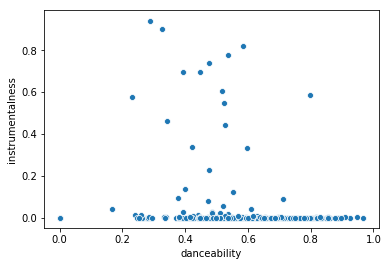

In [74]:
sns.scatterplot(x='danceability', y='instrumentalness', data=df)